# LSTM Model Implementation
This notebook demonstrates a complete workflow for building and training an LSTM-based model on text data. The steps include preprocessing, model creation, training, evaluation, and performance visualization.

## Importing Necessary Libraries
We start by importing the required libraries for data processing, model training, and evaluation.

In [1]:

import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from save_data import save_data
from data_split_ready import split_data


## Data Preparation
We load and preprocess the text data, converting it to sequences using a tokenizer and padding to ensure uniform input length.

In [2]:

# Load and split data
X_train, X_test, y_train, y_test, tokenizer = split_data('processed_text.csv')
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(sequence) for sequence in X_train)

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
    

## Model Architecture
We build an LSTM model with embedding layers, dropout, and dense layers for multi-class classification.

In [3]:

# Define LSTM Model
model = Sequential([
    Embedding(vocab_size, 100, input_length=max_length),
    LSTM(256, return_sequences=True),
    Dropout(0.2),
    LSTM(256, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()
    

C:\Users\Anutosh tiwari\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
We train the model with early stopping to prevent overfitting.

In [4]:

# Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])

# Save initial performance metrics
save_data(model, X_test, y_test, 'LSTM without class weights')
    

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 98s 280ms/step - accuracy: 0.7806 - loss: 0.6328 - val_accuracy: 0.8897 - val_loss: 0.3352
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - accuracy: 0.9097 - loss: 0.2908 - val_accuracy: 0.8884 - val_loss: 0.3264
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 84s 272ms/step - accuracy: 0.9282 - loss: 0.2293 - val_accuracy: 0.8800 - val_loss: 0.3847
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 84s 271ms/step - accuracy: 0.9334 - loss: 0.1816 - val_accuracy: 0.8796 - val_loss: 0.3846
155/155 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step
Metrics saved to model_metrics.csv


C:\Users\Anutosh tiwari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Dynamic Class Weights
We adjust class weights dynamically based on recall performance to handle class imbalances.

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_curve, roc_auc_score, precision_score, f1_score


In [7]:

# Dynamic Class Weights
class_weights = {0: 5, 1: 1, 2: 2}
epochs = 10
patience = 2
min_delta = 0.001
best_recall = 0
patience_counter = 0
num_classes = 3

for epoch in range(epochs):
    model.fit(X_train, y_train, epochs=1, batch_size=64, class_weight=class_weights)

    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    recall = recall_score(y_test, y_pred_classes, average=None, zero_division=0)
    mean_recall = np.mean(recall)

    print(f'Epoch {epoch + 1} Recall: {recall}, Mean Recall: {mean_recall}')

    if mean_recall > best_recall + min_delta:
        best_recall = mean_recall
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered. No significant improvement in recall.")
        break

    for i in range(num_classes):
        if recall[i] < 0.5:
            class_weights[i] *= 1.2
        elif recall[i] < 0.7:
            class_weights[i] *= 1.1
        else:
            class_weights[i] *= 0.9

    total_weight = sum(class_weights.values())
    class_weights = {k: v / total_weight for k, v in class_weights.items()}

    print(f'Updated Class Weights: {class_weights}')

# Save metrics after dynamic class weights
save_data(model, X_test, y_test, 'LSTM with class weights')
    

310/310 ━━━━━━━━━━━━━━━━━━━━ 78s 253ms/step - accuracy: 0.8643 - loss: 0.6064
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step
Epoch 1 Recall: [0.57931034 0.84681628 0.88263473], Mean Recall: 0.7695871197637839
Updated Class Weights: {0: 0.6707317073170731, 1: 0.1097560975609756, 2: 0.2195121951219512}
310/310 ━━━━━━━━━━━━━━━━━━━━ 76s 243ms/step - accuracy: 0.8798 - loss: 0.0618
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step
Epoch 2 Recall: [0.51034483 0.88152401 0.82035928], Mean Recall: 0.7374093724580212
Updated Class Weights: {0: 0.7134433962264151, 1: 0.0955188679245283, 2: 0.1910377358490566}
310/310 ━━━━━━━━━━━━━━━━━━━━ 76s 246ms/step - accuracy: 0.8864 - loss: 0.0549
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step
Epoch 3 Recall: [0.52758621 0.87891441 0.8502994 ], Mean Recall: 0.752266671034865
Early stopping triggered. No significant improvement in recall.
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step
Metrics saved to model_metrics.csv


## Model Evaluation
We evaluate the model's performance using precision, recall, and ROC-AUC metrics.

155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.53      0.36       290
           1       0.96      0.88      0.92      3832
           2       0.79      0.85      0.82       835

    accuracy                           0.85      4957
   macro avg       0.67      0.75      0.70      4957
weighted avg       0.89      0.85      0.87      4957



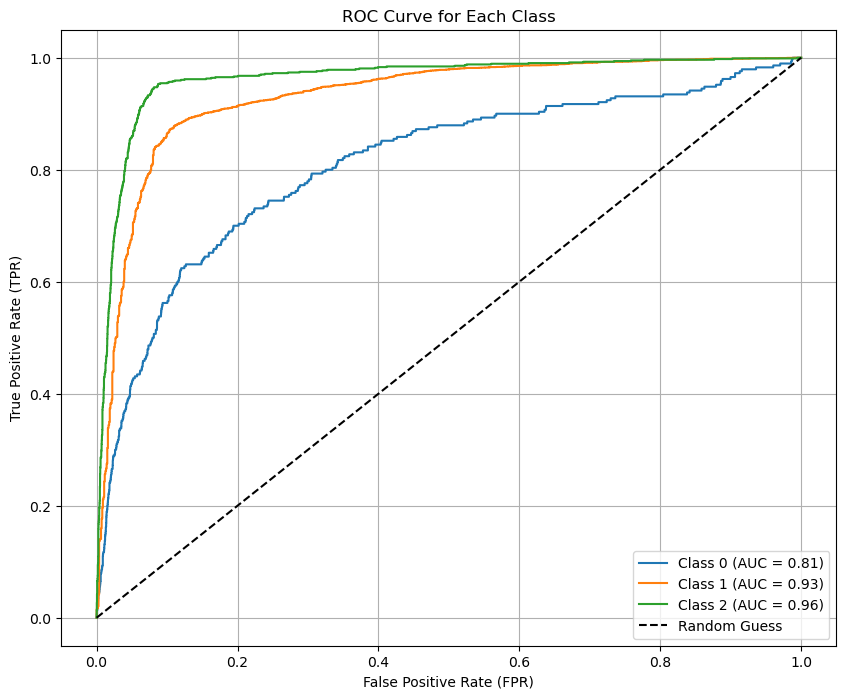

In [8]:

# Evaluate Model
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
print("Classification Report:")

print(classification_report(y_test, y_pred_classes))

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=range(num_classes))
auc_per_class = roc_auc_score(y_test_binarized, y_pred_probs, average=None)

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_per_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
    